In [117]:
import pandas as pd
import requests
import regex as re
import numpy as np
import datetime as dt
import networkx as nx
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import plotly.express as px


In [118]:
import yfinance as yf

def get_ticker_data(symbol, start='2024-01-01'):
    try:
        # Fetch data from Yahoo Finance
        ticker = yf.Ticker(symbol)
        data = ticker.history(start=start)

        # Calculate average and standard deviation of daily returns
        daily_returns = data['Close'].pct_change().dropna()
        avg_growth_rate = daily_returns.mean()
        stddev_growth_rate = daily_returns.std()

        # Extract additional information
        longname = ticker.info['longName']
        sector = ticker.info.get('sector')

        return avg_growth_rate, stddev_growth_rate, daily_returns, longname, sector

    except Exception as e:
        print(f"Error fetching data for symbol {symbol}: {e}")
        return None, None, None, None, None


In [119]:
sp_assets=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] 
assets=sp_assets['Symbol'].str.replace('.', '-').tolist()

In [120]:
etfs = []
urls = {
'sectors etf': 'https://www.cnbc.com/sector-etfs/',
'country_etf': 'https://www.cnbc.com/country-etfs/',
'commodity_etf': 'https://www.cnbc.com/commodity-etfs/',
'volatility_etf': 'https://www.cnbc.com/market-volatility-etfs/',
'mutual_fund': 'https://www.cnbc.com/mutual-funds/',
'funds_etf': 'https://www.cnbc.com/funds-and-etfs/',
}
for kind, url in urls.items():
    response=requests.get(url).text
    curr=[[item, kind] for item in re.findall(r'"symbol":"(.*?)"', response) if item.upper()==item and '.' not in item]
    print(url, len(curr)) 
    etfs+= [c for c in curr if c[0] not in [item[0] for item in etfs]]

https://www.cnbc.com/sector-etfs/ 25
https://www.cnbc.com/country-etfs/ 21
https://www.cnbc.com/commodity-etfs/ 20
https://www.cnbc.com/market-volatility-etfs/ 3
https://www.cnbc.com/mutual-funds/ 14
https://www.cnbc.com/funds-and-etfs/ 44


In [121]:
data= []
for i, info in enumerate (etfs):
    symbol, kind= info
    print(f'{i+1} / {len(etfs)}')
    avg_growth_rate, stddev_growth_rate, growth_rates, longname, sector= get_ticker_data(symbol, start= '2024-01-01')
    data.append([symbol, avg_growth_rate, stddev_growth_rate, growth_rates, kind, longname, sector])
    print(f'fraction of None in data: {np.mean([int(item[0]== None) for item in data])}')
    
for i, symbol in enumerate (assets):
    print(f'{i+1} / {len(assets)}')
    avg_growth_rate, stddev_growth_rate, growth_rates, longname, sector= get_ticker_data(symbol, start= '2024-01-01') 
    data.append([symbol, avg_growth_rate, stddev_growth_rate, growth_rates, 'individual', longname, sector])

1 / 109
fraction of None in data: 0.0
2 / 109
fraction of None in data: 0.0
3 / 109
fraction of None in data: 0.0
4 / 109
fraction of None in data: 0.0
5 / 109
fraction of None in data: 0.0
6 / 109
fraction of None in data: 0.0
7 / 109
fraction of None in data: 0.0
8 / 109
fraction of None in data: 0.0
9 / 109
fraction of None in data: 0.0
10 / 109
fraction of None in data: 0.0
11 / 109
fraction of None in data: 0.0
12 / 109
fraction of None in data: 0.0
13 / 109
fraction of None in data: 0.0
14 / 109
fraction of None in data: 0.0
15 / 109
fraction of None in data: 0.0
16 / 109
fraction of None in data: 0.0
17 / 109
fraction of None in data: 0.0
18 / 109
fraction of None in data: 0.0
19 / 109
fraction of None in data: 0.0
20 / 109
fraction of None in data: 0.0
21 / 109
fraction of None in data: 0.0
22 / 109
fraction of None in data: 0.0
23 / 109
fraction of None in data: 0.0
24 / 109
fraction of None in data: 0.0
25 / 109
fraction of None in data: 0.0
26 / 109
fraction of None in data:

406 / 502
407 / 502
408 / 502
409 / 502
410 / 502
411 / 502
412 / 502
413 / 502
414 / 502
415 / 502
416 / 502
417 / 502
418 / 502
419 / 502
420 / 502
421 / 502
422 / 502
423 / 502
424 / 502
425 / 502
426 / 502
427 / 502
428 / 502
429 / 502
430 / 502
431 / 502
432 / 502
433 / 502
434 / 502
435 / 502
436 / 502
437 / 502
438 / 502
439 / 502
440 / 502
441 / 502
442 / 502
443 / 502
444 / 502
445 / 502
446 / 502
447 / 502
448 / 502
449 / 502
450 / 502
451 / 502
452 / 502
453 / 502
454 / 502
455 / 502
456 / 502
457 / 502
458 / 502
459 / 502
460 / 502
461 / 502
462 / 502
463 / 502
464 / 502
465 / 502
466 / 502
467 / 502
468 / 502
469 / 502
470 / 502
471 / 502
472 / 502
473 / 502
474 / 502
475 / 502
476 / 502
477 / 502
478 / 502
479 / 502
480 / 502
481 / 502
482 / 502
483 / 502
484 / 502
485 / 502
486 / 502
487 / 502
488 / 502
489 / 502
490 / 502
491 / 502
492 / 502
493 / 502
494 / 502
495 / 502
496 / 502
497 / 502
498 / 502
499 / 502
500 / 502
501 / 502
502 / 502


In [123]:
data

[['XLE',
  0.001875681733089716,
  0.010296783105227773,
  Date
  2024-01-03 00:00:00-05:00    0.016285
  2024-01-04 00:00:00-05:00   -0.017534
  2024-01-05 00:00:00-05:00    0.000827
  2024-01-08 00:00:00-05:00   -0.011573
  2024-01-09 00:00:00-05:00   -0.016010
  2024-01-10 00:00:00-05:00   -0.009835
  2024-01-11 00:00:00-05:00    0.002575
  2024-01-12 00:00:00-05:00    0.011252
  2024-01-16 00:00:00-05:00   -0.023827
  2024-01-17 00:00:00-05:00   -0.008301
  2024-01-18 00:00:00-05:00   -0.001624
  2024-01-19 00:00:00-05:00    0.003254
  2024-01-22 00:00:00-05:00    0.003742
  2024-01-23 00:00:00-05:00    0.002113
  2024-01-24 00:00:00-05:00    0.014261
  2024-01-25 00:00:00-05:00    0.022497
  2024-01-26 00:00:00-05:00    0.007414
  2024-01-29 00:00:00-05:00   -0.001424
  2024-01-30 00:00:00-05:00    0.010341
  2024-01-31 00:00:00-05:00   -0.018706
  2024-02-01 00:00:00-05:00   -0.000120
  2024-02-02 00:00:00-05:00    0.001439
  2024-02-05 00:00:00-05:00   -0.002514
  2024-02-06 00:

In [124]:
data={sym:
        [avg_growth, stddev_growth, growth_rates, kind, longname, sector]
        for sym, avg_growth, stddev_growth, growth_rates, kind, longname, sector 
        in data
        if str(avg_growth) != 'None'
    }
today= dt.datetime.today()
yesterday= today- dt.timedelta(days=1)
yesterday=f'{yesterday.year}-{yesterday.month}-{yesterday.day}'

In [125]:
data

{'XLE': [0.001875681733089716,
  0.010296783105227773,
  Date
  2024-01-03 00:00:00-05:00    0.016285
  2024-01-04 00:00:00-05:00   -0.017534
  2024-01-05 00:00:00-05:00    0.000827
  2024-01-08 00:00:00-05:00   -0.011573
  2024-01-09 00:00:00-05:00   -0.016010
  2024-01-10 00:00:00-05:00   -0.009835
  2024-01-11 00:00:00-05:00    0.002575
  2024-01-12 00:00:00-05:00    0.011252
  2024-01-16 00:00:00-05:00   -0.023827
  2024-01-17 00:00:00-05:00   -0.008301
  2024-01-18 00:00:00-05:00   -0.001624
  2024-01-19 00:00:00-05:00    0.003254
  2024-01-22 00:00:00-05:00    0.003742
  2024-01-23 00:00:00-05:00    0.002113
  2024-01-24 00:00:00-05:00    0.014261
  2024-01-25 00:00:00-05:00    0.022497
  2024-01-26 00:00:00-05:00    0.007414
  2024-01-29 00:00:00-05:00   -0.001424
  2024-01-30 00:00:00-05:00    0.010341
  2024-01-31 00:00:00-05:00   -0.018706
  2024-02-01 00:00:00-05:00   -0.000120
  2024-02-02 00:00:00-05:00    0.001439
  2024-02-05 00:00:00-05:00   -0.002514
  2024-02-06 00:00

In [127]:
ticker= yf.Ticker("^TNX")
hist= ticker.history(start= yesterday, interval= '1d').Close
hist= hist[-hist.isna()]
curr_10_year_treasury_yield= hist.iloc[-1]/100
#conver this annual rate to weekly
curr_10_year_treasury_yield_weekly= (1+curr_10_year_treasury_yield)**(7/365)-1
curr_10_year_treasury_yield_weekly

0.0007990948437961443

In [128]:
G=nx.Graph()
#if two stocks share this or more correlation in their weekly returns, #then only pick one from each group 
edge_threshold = 0.975
corrs= []
i1=-1
for s1, info1 in data.items():
    i1+=1
    g1=info1[2]
    if str(g1)=='None':
        continue
    i2=-1
    for s2, info2 in data.items():
        i2 +=1
        if i2<=i1:
            continue
        g2=info2[2]
        if str(g2)=='None':
            continue
        joined= g1.reset_index().merge(g2.reset_index(), on= 'Date')
        corr= pearsonr(joined.Close_x, joined.Close_y)[0] 
        corrs.append([s1, s2, corr])
        if corr> edge_threshold: 
            G.add_edge(s1,s2)

In [129]:
S=[G.subgraph(c).copy() for c in nx.connected_components(G)][::-1]

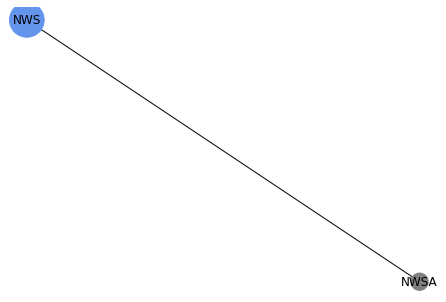

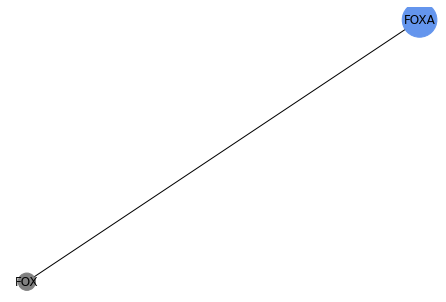

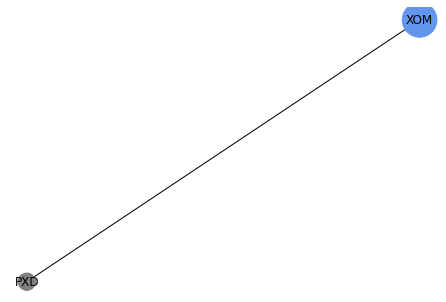

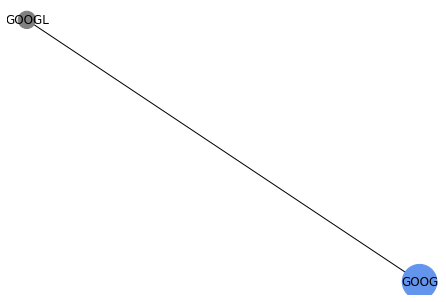

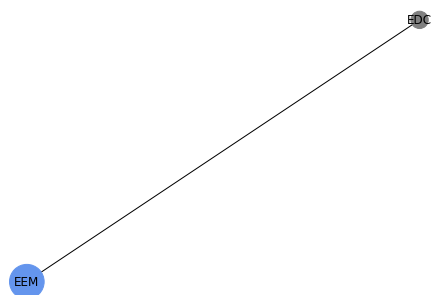

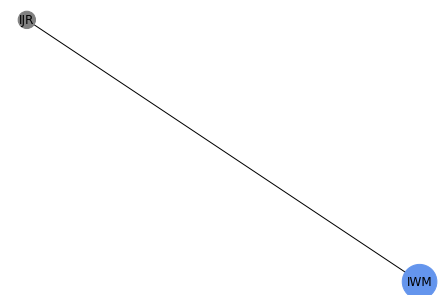

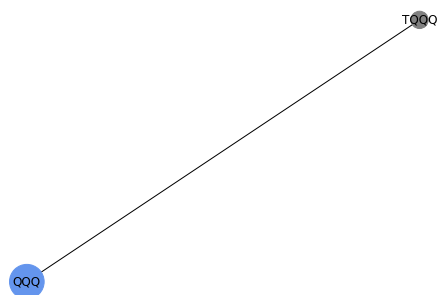

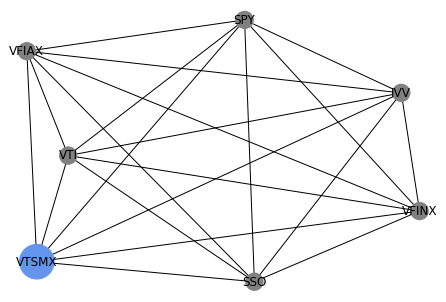

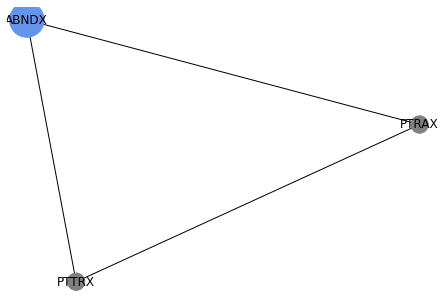

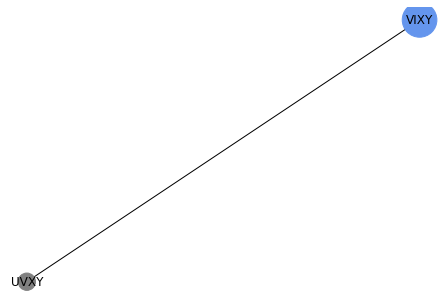

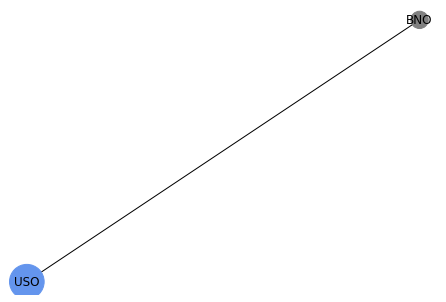

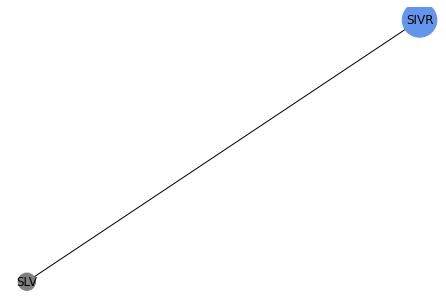

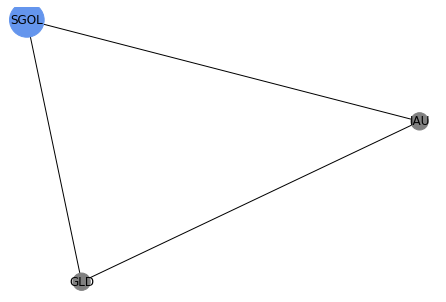

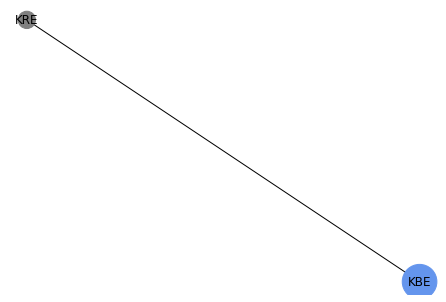

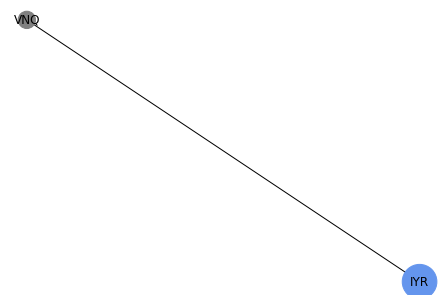

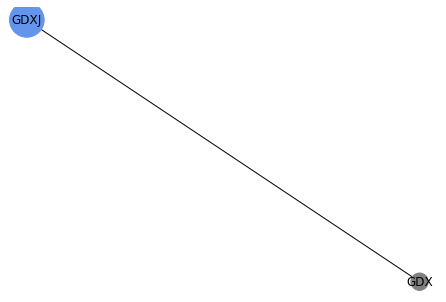

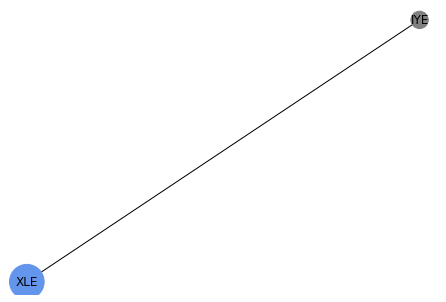

In [130]:
uncorr_stocks= []
for i,s in enumerate(S): 
    plt.show()
    group_stocks_sharpe_ratios= [
        (
        sym,
        (data.get(sym)[0]- curr_10_year_treasury_yield_weekly) /data.get(sym)[1]
        )
        for sym in s
    ]
    top_stocks= [item[0] for item in sorted (group_stocks_sharpe_ratios, key=lambda x:-x[1])]
    nx.draw(s, with_labels=True, node_color=['cornflowerblue']+['gray']*(len(s)-1), node_size= [1200]+[300]*(len(s)-1)) 
    for sym in top_stocks:
        uncorr_stocks.append([sym, i]) 
non_connected_stocks= [sym for sym in data.keys() if sym not in [item[0] for item in uncorr_stocks]]
for sym in non_connected_stocks: 
    uncorr_stocks.append([sym, i+1])
    i+=1

In [131]:
data_df= []
for info in uncorr_stocks:
    sym= info[0]
    group= info[1]
    info= data.get(sym)
    data_df.append([sym, info[0], info[1], (info[0]- curr_10_year_treasury_yield_weekly) / info[1] if info[1] > 0 else None,info[4],info[3]])

uncorr_df= pd.DataFrame(
    columns= ['symbol', 'avg_growth', 'stddev_growth', 'sharpe_ratio', 'group', 'kind'],
    data= data_df
)
uncorr_df= uncorr_df.sort_values('sharpe_ratio', ascending= False).reset_index(drop=True)
d=str(dt.datetime.today().strftime('%Y-%m-%d'))
uncorr_df.to_csv(f'uncorr_data_{d}.csv', index=False)

In [132]:
pos_df=uncorr_df

In [133]:
shortlist_df= pos_df.drop_duplicates (
subset=['symbol'],
keep= 'last'
).sort_values (
'sharpe_ratio',
ascending= False
).drop_duplicates(
subset=['group'], 
    keep= 'first'
).reset_index(
drop=True)

In [134]:
shortlist=list(shortlist_df.symbol.iloc[:10])

In [150]:
shortlist_df.iloc[:20]

symbol  avg_growth  stddev_growth  sharpe_ratio  \
0      GE    0.005703       0.011880      0.412783   
1     HIG    0.003855       0.008386      0.364421   
2    NVDA    0.012472       0.032093      0.363711   
3     PGR    0.004409       0.010555      0.341976   
4     DXJ    0.003605       0.008499      0.330099   
5     NRG    0.005230       0.013531      0.327462   
6    PCAR    0.004380       0.011368      0.315038   
7     DBA    0.003098       0.007515      0.305837   
8    SMCI    0.026530       0.088540      0.290613   
9    TRGP    0.004689       0.013521      0.287664   
10    CMG    0.004612       0.013534      0.281728   
11    ETN    0.004850       0.014909      0.271705   
12    TDG    0.003739       0.010834      0.271376   
13    CEG    0.009030       0.030948      0.265954   
14    RSG    0.002480       0.006548      0.256766   
15     FI    0.002914       0.008434      0.250811   
16     IR    0.003729       0.011766      0.249047   
17    MPC    0.004998       0.017094      0.245608   
18    MLM    0.003759       0.012227      0.242083   
19    LLY    0.004859       0.016961      0.239389   

                                          group           kind  
0                      General Electric Company     individual  
1   The Hartford Financial Services Group, Inc.     individual  
2                            NVIDIA Corporation     individual  
3                   The Progressive Corporation     individual  
4           WisdomTree Japan Hedged Equity Fund    country_etf  
5                              NRG Energy, Inc.     individual  
6                                    PACCAR Inc     individual  
7                   Invesco DB Agriculture Fund  commodity_etf  
8                    Super Micro Computer, Inc.     individual  
9                         Targa Resources Corp.     individual  
10                 Chipotle Mexican Grill, Inc.     individual  
11                        Eaton Corporation plc     individual  
12                 TransDigm Group Incorporated     individual  
13             Constellation Energy Corporation     individual  
14                      Republic Services, Inc.     individual  
15                                 Fiserv, Inc.     individual  
16                          Ingersoll Rand Inc.     individual  
17               Marathon Petroleum Corporation     individual  
18              Martin Marietta Materials, Inc.     individual  
19                        Eli Lilly and Company     individual

In [ ]:
#shortlist=[s for s in shortlist if s not in []]

In [136]:
def stock_compare(syms, start):
    curr_prices=[]
    dfs= []
    for i, sym in enumerate (syms):
        ticker= yf.Ticker(sym)
        hist= ticker.history(start= start, interval='1d').Close.reset_index()
        hist= hist[-hist.isna()]
        curr_prices.append(hist.Close.iloc[-1])
        hist['normed price']= (hist.Close- hist.Close.mean()) / hist.Close.std()
        hist['return']= hist.Close.pct_change().dropna()
        hist['symbol']= sym
        dfs.append(hist)
    d=pd.concat(dfs)
    fig= px.line(d, x="Date", y="return", color= 'symbol')
    fig.show()
    return curr_prices

In [137]:
curr_prices=stock_compare(shortlist,'2024-01-01')
display(uncorr_df.symbol.isin(shortlist))

0       True
1       True
2       True
3       True
4       True
       ...  
601    False
602    False
603    False
604    False
605    False
Name: symbol, Length: 606, dtype: bool

In [138]:
inv_target= 500
s=shortlist_df[shortlist_df.symbol.isin(shortlist)].reset_index(drop=True)
s['curr_price'] = curr_prices
s['frac_inv']= s.sharpe_ratio / s.sharpe_ratio.sum()
s['n_shares']= (inv_target* s.frac_inv / s.curr_price)
s['inv_amt']=s.n_shares* s.curr_price
display(s)
tot_cost= round(np.sum(s.n_shares*s.curr_price),2)
print(f'tot_cost= ${tot_cost}')

symbol  avg_growth  stddev_growth  sharpe_ratio  \
0     GE    0.005703       0.011880      0.412783   
1    HIG    0.003855       0.008386      0.364421   
2   NVDA    0.012472       0.032093      0.363711   
3    PGR    0.004409       0.010555      0.341976   
4    DXJ    0.003605       0.008499      0.330099   
5    NRG    0.005230       0.013531      0.327462   
6   PCAR    0.004380       0.011368      0.315038   
7    DBA    0.003098       0.007515      0.305837   
8   SMCI    0.026530       0.088540      0.290613   
9   TRGP    0.004689       0.013521      0.287664   

                                         group           kind   curr_price  \
0                     General Electric Company     individual   173.490005   
1  The Hartford Financial Services Group, Inc.     individual   100.669998   
2                           NVIDIA Corporation     individual   950.020020   
3                  The Progressive Corporation     individual   206.020004   
4          WisdomTree Japan Hedged Equity Fund    country_etf   107.839996   
5                             NRG Energy, Inc.     individual    68.129997   
6                                   PACCAR Inc     individual   123.400002   
7                  Invesco DB Agriculture Fund  commodity_etf    24.639999   
8                   Super Micro Computer, Inc.     individual  1042.790039   
9                        Targa Resources Corp.     individual   111.610001   

   frac_inv  n_shares    inv_amt  
0  0.123603  0.356224  61.801259  
1  0.109121  0.541973  54.560446  
2  0.108908  0.057319  54.454242  
3  0.102400  0.248520  51.200061  
4  0.098844  0.458289  49.421885  
5  0.098054  0.719610  49.027013  
6  0.094334  0.382228  47.166975  
7  0.091579  1.858338  45.789437  
8  0.087020  0.041725  43.510051  
9  0.086137  0.385885  43.068630

tot_cost= $500.0


In [139]:
amt_inv={
    'GE':61.8,
    'HIG':54.56,
    'NVDA':54.45,
    'PGR':51.2,
    'DXJ':49.42,
    'NRG':49.02,
    'PCAR':47.16,
    'DBA':45.7,
    'SMCI':43.5,
    'TRGP':43.0,
}

In [151]:
correlation_data = corrs
correlation_df = pd.DataFrame(correlation_data, columns=['Stock1', 'Stock2', 'Correlation'])



In [152]:
correlation_df

Stock1 Stock2  Correlation
0         XLE    XLF     0.313269
1         XLE    XLU     0.271023
2         XLE    XLI     0.153507
3         XLE    GDX     0.296079
4         XLE    XLK    -0.045822
...       ...    ...          ...
183310    YUM    ZBH     0.247877
183311    YUM    ZTS     0.281667
183312   ZBRA    ZBH     0.305938
183313   ZBRA    ZTS     0.366279
183314    ZBH    ZTS     0.344350

[183315 rows x 3 columns]

In [155]:
shortlist

['GE', 'HIG', 'NVDA', 'PGR', 'DXJ', 'NRG', 'PCAR', 'DBA', 'SMCI', 'TRGP']

In [153]:
filtered_correlation_df = correlation_df[(correlation_df['Stock1'].isin(shortlist)) & 
                                         (correlation_df['Stock2'].isin(shortlist))]

In [156]:
filtered_correlation_df

Stock1 Stock2  Correlation
17161     DXJ    DBA    -0.164477
17428     DXJ     GE     0.166682
17437     DXJ    HIG     0.106159
17559     DXJ    NRG     0.150232
17561     DXJ   NVDA     0.341211
17572     DXJ   PCAR     0.261162
17594     DXJ    PGR     0.027026
17641     DXJ   SMCI     0.047077
17649     DXJ   TRGP     0.102262
30400     DBA     GE    -0.060268
30409     DBA    HIG     0.089403
30531     DBA    NRG    -0.102999
30533     DBA   NVDA    -0.036854
30544     DBA   PCAR     0.109436
30566     DBA    PGR     0.150859
30613     DBA   SMCI     0.044719
30621     DBA   TRGP    -0.094808
142282     GE    HIG     0.079412
142404     GE    NRG    -0.105555
142406     GE   NVDA     0.338944
142417     GE   PCAR     0.265888
142439     GE    PGR     0.172110
142486     GE   SMCI     0.264748
142494     GE   TRGP     0.225451
144933    HIG    NRG     0.173832
144935    HIG   NVDA     0.183146
144946    HIG   PCAR     0.137786
144968    HIG    PGR     0.166531
145015    HIG   SMCI     0.149440
145023    HIG   TRGP     0.174870
171226    NRG   NVDA     0.088969
171237    NRG   PCAR     0.237489
171259    NRG    PGR    -0.016053
171306    NRG   SMCI     0.097878
171314    NRG   TRGP     0.196909
171544   NVDA   PCAR     0.260120
171566   NVDA    PGR     0.151616
171613   NVDA   SMCI     0.589694
171621   NVDA   TRGP    -0.026576
173183   PCAR    PGR     0.213711
173230   PCAR   SMCI     0.209971
173238   PCAR   TRGP     0.209144
176101    PGR   SMCI     0.120194
176109    PGR   TRGP     0.057107
180621   SMCI   TRGP     0.009189

In [161]:
correlation_matrix = pd.DataFrame(np.eye(len(shortlist)), index=shortlist, columns=shortlist)

# Fill in the correlation values from the data
for i in range(len(shortlist)):
    for j in range(i + 1, len(shortlist)):
        stock1 = shortlist[i]
        stock2 = shortlist[j]
        corr_val = correlation_df[((correlation_df['Stock1'] == stock1) & (correlation_df['Stock2'] == stock2)) |
                                   ((correlation_df['Stock1'] == stock2) & (correlation_df['Stock2'] == stock1))]
        if not corr_val.empty:
            correlation_matrix.at[stock1, stock2] = corr_val['Correlation'].values[0]
            correlation_matrix.at[stock2, stock1] = corr_val['Correlation'].values[0]

# Create an interactive correlation matrix using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r')

# Add text to the cubes
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.index[i], y=correlation_matrix.columns[j],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False, font=dict(color='white'))

fig.update_layout(title='Interactive Correlation Matrix of Shortlisted Stocks',
                  xaxis_title='Stocks',
                  yaxis_title='Stocks')

fig.show()